Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Farnoush"


## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(20 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? Conduct a detailed analysis to identify which passengers were most likely to survive. _(15 points)_
* The detailed explanation of the logic of the analysis _(5 points)_

**Question 2.**  _(5 points)_
* What attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(5 points)_
* Were there any missing values? How did they impact your analysis? Consider dropping the rows with missing values using the drop() function. Did your findings change?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
Titan=pd.read_csv(r"C:\Users\msfar\OneDrive\Desktop\Python1-UOT\train.csv")

#### Just looking at the data and have some high level analysis

In [5]:
Titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Titan.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
Titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:

Titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
Titan.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

#### Checking for duplicates

In [10]:
Titan.duplicated(subset=['PassengerId'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [11]:
Titan .drop_duplicates(subset=['PassengerId'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Ther was no duplicate values based on the passenger Id.

#### Checking for the role of gender in survival based on pure guess, nothing else. As it was the begining of my thoughts.

In [12]:
Titan[['Survived','Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [13]:
Titan[Titan['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
Titan[(Titan['Sex']=='female') & (Titan['Survived']!=1)].count()

PassengerId    81
Survived       81
Pclass         81
Name           81
Sex            81
Age            64
SibSp          81
Parch          81
Ticket         81
Fare           81
Cabin           6
Embarked       81
dtype: int64

In [15]:
Titan[(Titan['Sex']=='male') & (Titan['Survived']==1)].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

#### With just a count we can say morewomen survived than men.

#### Looking at the fare, just based on pure guess.

In [16]:
Titan.sort_values('Fare',ascending=[False])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


#### Here I just figure out I can look at the correlation and move forward more stratgically

<Axes: >

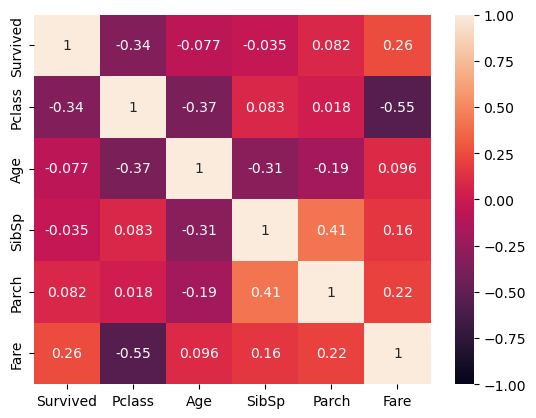

In [17]:
sns.heatmap(Titan[['Survived','Pclass', 'Age','SibSp','Parch','Fare']].corr(), vmin=-1, vmax=1, annot=True)

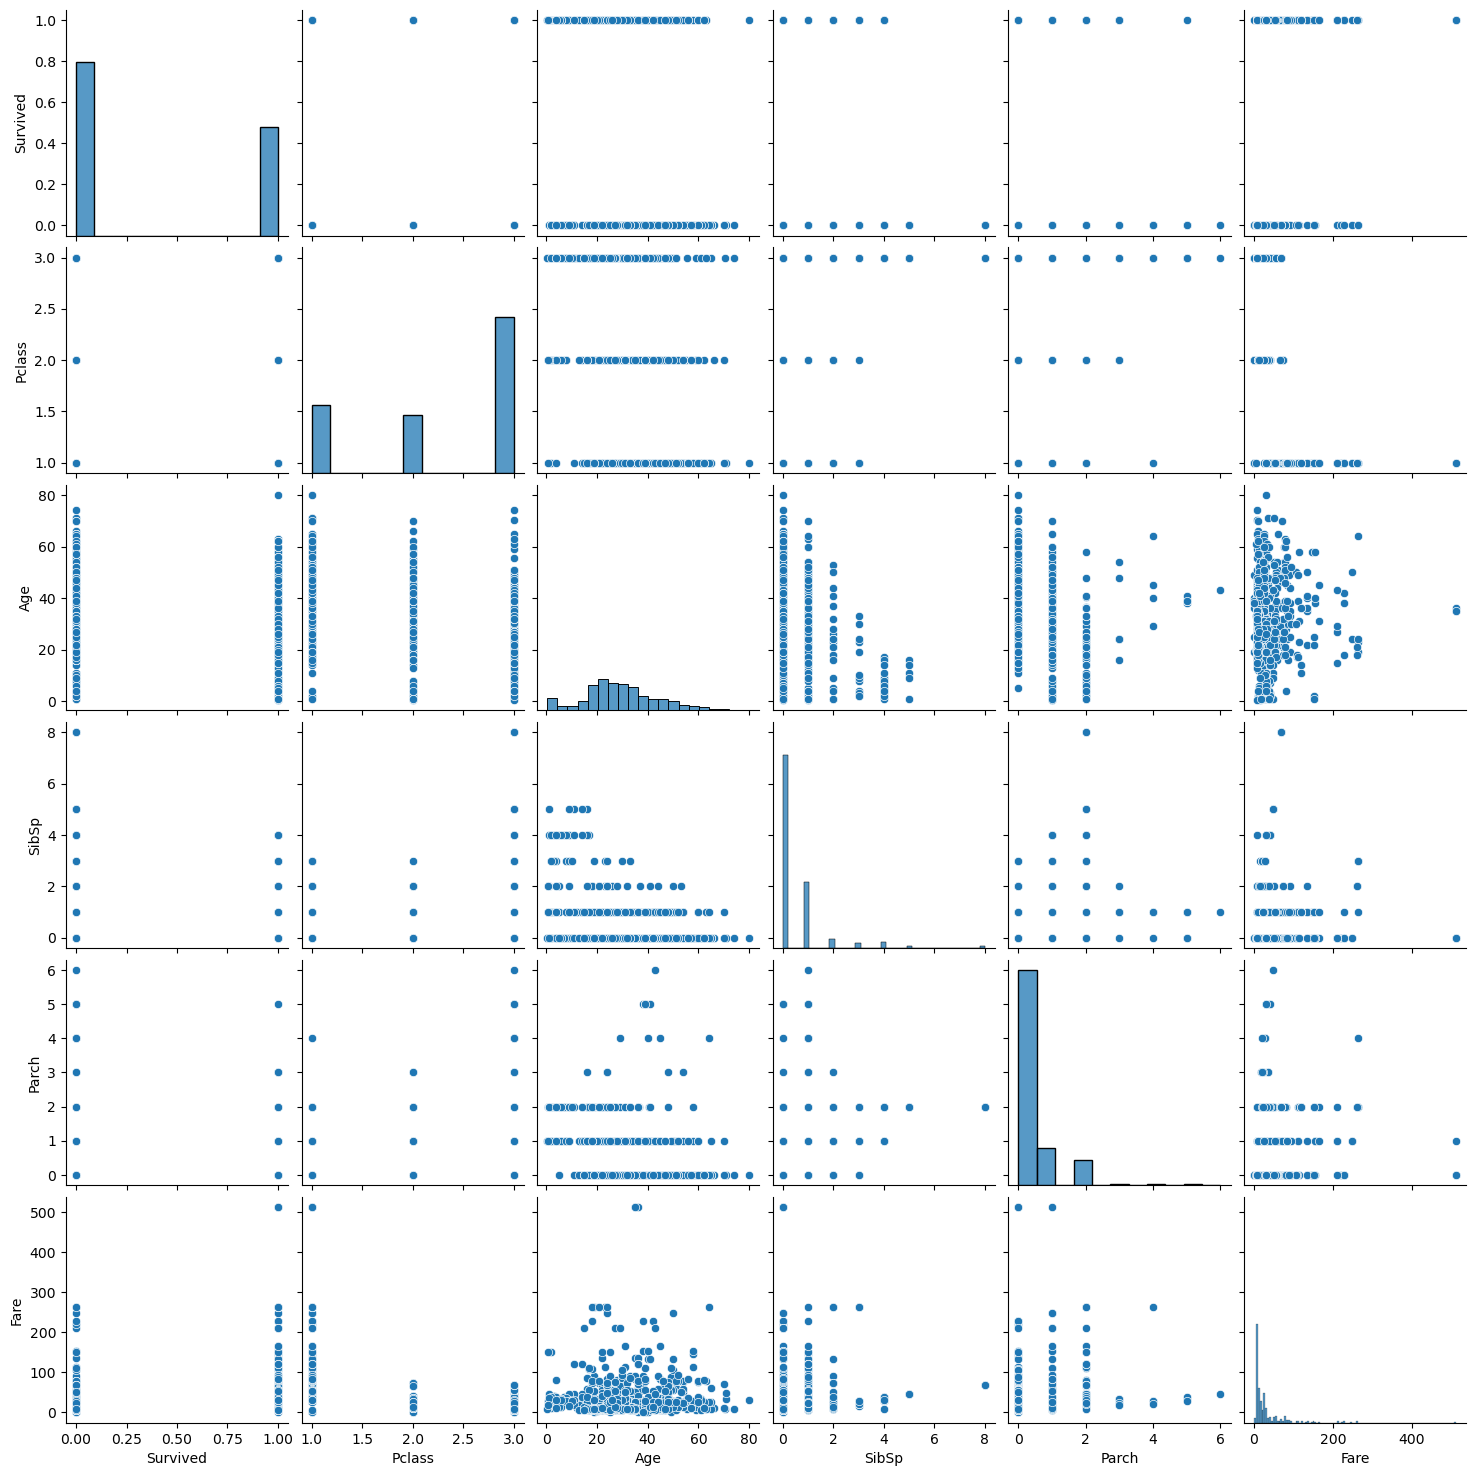

In [18]:
sns.pairplot(Titan[['Survived','Pclass', 'Age','SibSp','Parch','Fare']])

#### The above plot didn't add that much to my understandings, maybe because most of the variables were catogocrical. There is just a distribution between ages and Fare which looks like normal disribiution, so I didn't do anything with it.

#### Dropped non correlated values.

In [19]:
Titan.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [20]:
Titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

#### Making Female values as 1 and Males as 0 to be able do more analysis.

In [21]:
Titan1=pd.get_dummies(Titan['Sex'])

In [22]:
Titan=pd.concat((Titan,Titan1), axis=1)

In [23]:
Titan=Titan.drop(['Sex','male'], axis=1)

In [24]:
Titan=Titan.rename(columns={'female':'Sex'})

In [25]:
Titan

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,S,False
1,2,1,1,38.0,1,0,71.2833,C,True
2,3,1,3,26.0,0,0,7.9250,S,True
3,4,1,1,35.0,1,0,53.1000,S,True
4,5,0,3,35.0,0,0,8.0500,S,False
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,False
887,888,1,1,19.0,0,0,30.0000,S,True
888,889,0,3,NaN,1,2,23.4500,S,True
889,890,1,1,26.0,0,0,30.0000,C,False


<Axes: >

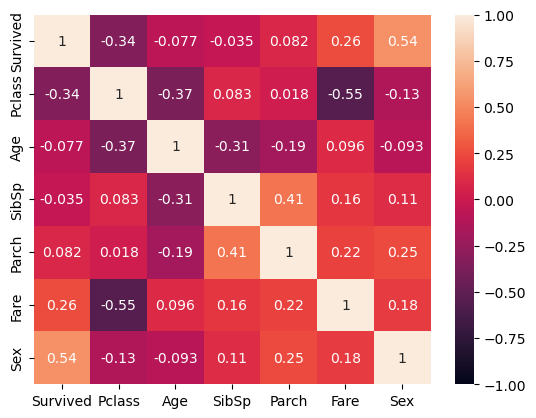

In [26]:
# Sex=Woman is True
sns.heatmap(Titan[['Survived','Pclass', 'Age','SibSp','Parch','Fare','Sex']].corr(), vmin=-1, vmax=1, annot=True)

#### There is a strong correlation between survival and gender,Pclass and The Fare. Women with more expensive tickets (meaning they would come from higher class), were more likely to survive. Also, Pclass describes the socioeconomic class of the passengers, this confirms its correlation with survival. Pclass has correlation with the fare as well.

#### Looked at the gender as see it effects on survival rate

<Axes: xlabel='Sex', ylabel='count'>

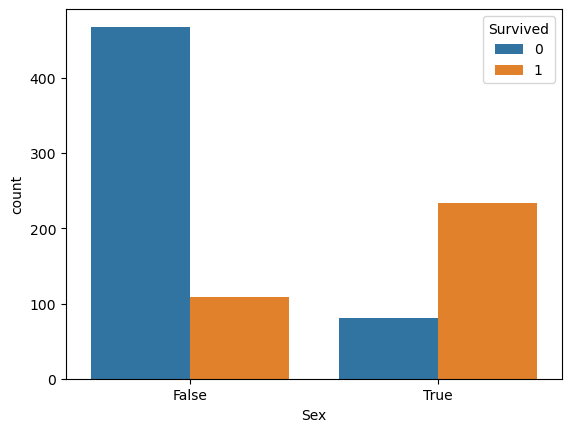

In [27]:
sns.countplot(x='Sex',hue='Survived',data=Titan)

#### This plot shows although there were more men onboard but more women were survived wich confirms that gender was a vital factor in survival.

### I am curious about age, I thought maybe children and elderly people have a higher survival rate but the correlation does not show anything.
### I am going to look at it anyway.

<Axes: xlabel='Survived', ylabel='Age'>

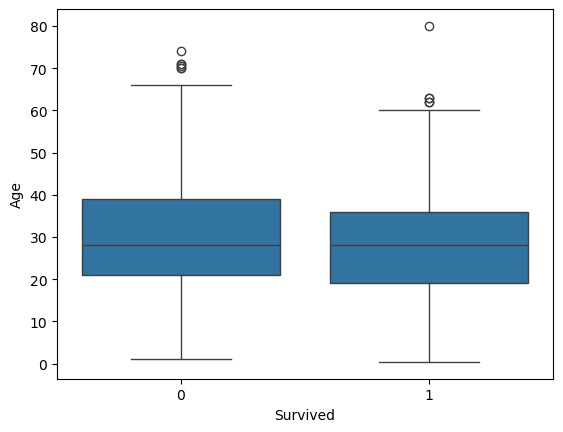

In [28]:
sns.boxplot(x='Survived',y='Age',data=Titan)


#### The above plot shows generally people who survived on average aged around 30 with smaller distribiution but people who died had greater distribution and their mean was less than 30.
#### There are also some outlires in survivors, who are way older! 

#### Having a deeper look at age

<Axes: xlabel='Age', ylabel='Count'>

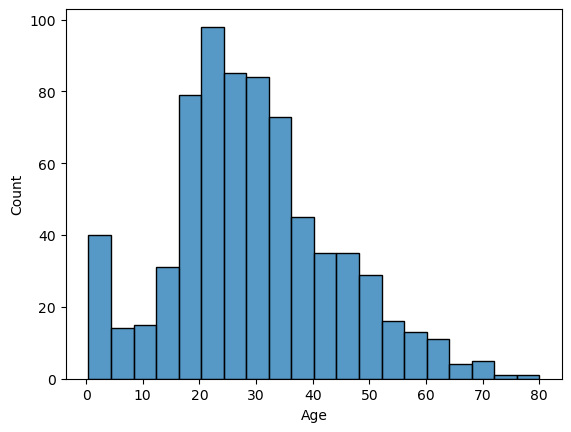

In [29]:
sns.histplot(Titan['Age'])

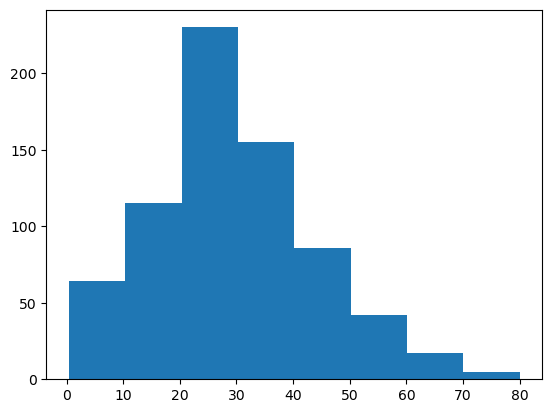

In [30]:
n, bins, patches=plt.hist(Titan['Age'], bins=8)

In [31]:
print(n, bins)

[ 64. 115. 230. 155.  86.  42.  17.   5.] [ 0.42   10.3675 20.315  30.2625 40.21   50.1575 60.105  70.0525 80.    ]


In [32]:
histogram_dist = pd.DataFrame([n,bins]).T

In [33]:
histogram_dist[1] = histogram_dist[1].astype(int)

In [34]:
histogram_dist['top_range'] = histogram_dist[1].shift(-1)

In [35]:
histogram_dist.rename(columns={1:'bottom_range', 0:'count'}, inplace=True)

In [36]:
histogram_dist

,count,bottom_range,top_range
0,64.0,0,10.0
1,115.0,10,20.0
2,230.0,20,30.0
3,155.0,30,40.0
4,86.0,40,50.0
5,42.0,50,60.0
6,17.0,60,70.0
7,5.0,70,80.0
8,NaN,80,NaN


#### As the majority of passengers were between 10 to 40 years old, so the probability of finding more survivors in this age range is higher as well. Therefore I want to look at the population of each age in the whole sample and then compare the survival rate.

In [37]:
Bins=[0,10,20,30,40,50,60,70,80]
labels = [1,2,3,4,5,6,7,8]
s = pd.cut(Titan['Age'], bins=Bins,labels=labels).value_counts()

In [38]:
s=s.sort_index(ascending=True)

In [39]:
s

Age
1     64
2    115
3    230
4    155
5     86
6     42
7     17
8      5
Name: count, dtype: int64

In [40]:
AgeDist=pd.DataFrame({'Age':s.index, 'Total':s.values})

In [41]:
AgeDist

,Age,Total
0,1,64
1,2,115
2,3,230
3,4,155
4,5,86
5,6,42
6,7,17
7,8,5


In [42]:
total=AgeDist['Total'].sum()
total

714

#### I notice here that the total count of ages is 714 but the total count of the rows is 891, so I am going to delete the rows that the age is null.

In [43]:
Titan.columns[Titan.isna().any()].tolist()

['Age', 'Embarked']

In [44]:
Titan.dropna(subset=['Age'], inplace=True)

In [45]:
Titan

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,S,False
1,2,1,1,38.0,1,0,71.2833,C,True
2,3,1,3,26.0,0,0,7.9250,S,True
3,4,1,1,35.0,1,0,53.1000,S,True
4,5,0,3,35.0,0,0,8.0500,S,False
...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,True
886,887,0,2,27.0,0,0,13.0000,S,False
887,888,1,1,19.0,0,0,30.0000,S,True
889,890,1,1,26.0,0,0,30.0000,C,False


#### Deviding each age sample by the whole number of data to have the percentage. I don't want to just calculate absolute values, I want to calculate the ratios or number of people in a age range to the number of survived ones in that range.

#### What I do here is, I basically find out how many people where in each age range on board and devide the count of survived ones by the count of total people onboard in that age range.

In [46]:
AgeDist['TotalAgeDist']=AgeDist['Total']/714

In [47]:
AgeDist

,Age,Total,TotalAgeDist
0,1,64,0.089636
1,2,115,0.161064
2,3,230,0.322129
3,4,155,0.217087
4,5,86,0.120448
5,6,42,0.058824
6,7,17,0.023810
7,8,5,0.007003


In [48]:
Titan.assign(counts=Titan.groupby(pd.cut(Titan['Age'], bins=[0,10,20,30,40,50,60,70,80]))['Age'].transform('count'))
# I didn't really use this.

C:\Users\msfar\AppData\Local\Temp\ipykernel_10152\2917255401.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Titan.assign(counts=Titan.groupby(pd.cut(Titan['Age'], bins=[0,10,20,30,40,50,60,70,80]))['Age'].transform('count'))


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,counts
0,1,0,3,22.0,1,0,7.2500,S,False,230
1,2,1,1,38.0,1,0,71.2833,C,True,155
2,3,1,3,26.0,0,0,7.9250,S,True,230
3,4,1,1,35.0,1,0,53.1000,S,True,155
4,5,0,3,35.0,0,0,8.0500,S,False,155
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,True,155
886,887,0,2,27.0,0,0,13.0000,S,False,230
887,888,1,1,19.0,0,0,30.0000,S,True,115
889,890,1,1,26.0,0,0,30.0000,C,False,230


In [49]:
Titan2 = Titan.groupby([pd.cut(Titan['Age'], bins=8), 'Survived']).size().reset_index(name='count')
Titan2

C:\Users\msfar\AppData\Local\Temp\ipykernel_10152\3616499830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Titan2 = Titan.groupby([pd.cut(Titan['Age'], bins=8), 'Survived']).size().reset_index(name='count')


,Age,Survived,count
0,"(0.34, 10.368]",0,26
1,"(0.34, 10.368]",1,38
2,"(10.368, 20.315]",0,71
3,"(10.368, 20.315]",1,44
4,"(20.315, 30.263]",0,146
5,"(20.315, 30.263]",1,84
6,"(30.263, 40.21]",0,86
7,"(30.263, 40.21]",1,69
8,"(40.21, 50.158]",0,53
9,"(40.21, 50.158]",1,33


####  Divide it by the whole number of people who were in that  age range.

In [50]:

Titan2=Titan2[Titan2.Survived !=0]

In [51]:
Titan2

,Age,Survived,count
1,"(0.34, 10.368]",1,38
3,"(10.368, 20.315]",1,44
5,"(20.315, 30.263]",1,84
7,"(30.263, 40.21]",1,69
9,"(40.21, 50.158]",1,33
11,"(50.158, 60.105]",1,17
13,"(60.105, 70.052]",1,4
15,"(70.052, 80.0]",1,1


In [52]:
Titan2=Titan2.reset_index(drop=True)

In [53]:
Titan2

,Age,Survived,count
0,"(0.34, 10.368]",1,38
1,"(10.368, 20.315]",1,44
2,"(20.315, 30.263]",1,84
3,"(30.263, 40.21]",1,69
4,"(40.21, 50.158]",1,33
5,"(50.158, 60.105]",1,17
6,"(60.105, 70.052]",1,4
7,"(70.052, 80.0]",1,1


In [54]:
Titan2.rename(columns={'Age':'AgeRange'}, inplace=True)

In [55]:
Titan2=Titan2.assign(Age=[1,2,3,4,5,6,7,8])

In [56]:
Titan2['SurvivalPercent']=Titan2['count']/AgeDist['Total']

In [57]:
Titan2

,AgeRange,Survived,count,Age,SurvivalPercent
0,"(0.34, 10.368]",1,38,1,0.593750
1,"(10.368, 20.315]",1,44,2,0.382609
2,"(20.315, 30.263]",1,84,3,0.365217
3,"(30.263, 40.21]",1,69,4,0.445161
4,"(40.21, 50.158]",1,33,5,0.383721
5,"(50.158, 60.105]",1,17,6,0.404762
6,"(60.105, 70.052]",1,4,7,0.235294
7,"(70.052, 80.0]",1,1,8,0.200000


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(0.34, 10.368]'),
  Text(1, 0, '(10.368, 20.315]'),
  Text(2, 0, '(20.315, 30.263]'),
  Text(3, 0, '(30.263, 40.21]'),
  Text(4, 0, '(40.21, 50.158]'),
  Text(5, 0, '(50.158, 60.105]'),
  Text(6, 0, '(60.105, 70.052]'),
  Text(7, 0, '(70.052, 80.0]')])

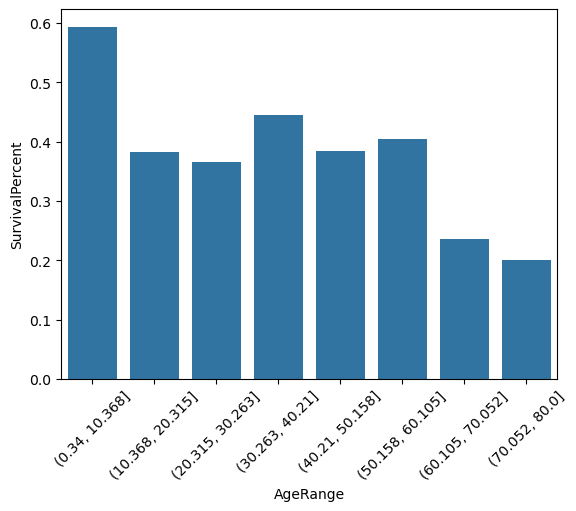

In [58]:
sns.barplot(x='AgeRange', y='SurvivalPercent',data=Titan2)
plt.xticks(rotation=45)

#### The above plot shows childeren under the age of 10 had the most chance to survive and after that youthsbetween 20 to 30 years old.
#### So age was very effective in survival

#### Now I am curious to see if children sex would affect their survival or not, for this reason I look at the sext of ruvived people under the age 15.

In [59]:
# I drop rows that their age is more than 15 yrs old.
Children=Titan[Titan['Age']<=15]

In [60]:
Children

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
7,8,0,3,2.00,3,1,21.0750,S,False
9,10,1,2,14.00,1,0,30.0708,C,True
10,11,1,3,4.00,1,1,16.7000,S,True
14,15,0,3,14.00,0,0,7.8542,S,True
16,17,0,3,2.00,4,1,29.1250,Q,False
...,...,...,...,...,...,...,...,...,...
831,832,1,2,0.83,1,1,18.7500,S,False
850,851,0,3,4.00,4,2,31.2750,S,False
852,853,0,3,9.00,1,1,15.2458,C,True
869,870,1,3,4.00,1,1,11.1333,S,False


In [61]:
#I also just keep the survived ones
Children=Titan[Titan['Survived']==1]

In [62]:
Children

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
1,2,1,1,38.0,1,0,71.2833,C,True
2,3,1,3,26.0,0,0,7.9250,S,True
3,4,1,1,35.0,1,0,53.1000,S,True
8,9,1,3,27.0,0,2,11.1333,S,True
9,10,1,2,14.0,1,0,30.0708,C,True
...,...,...,...,...,...,...,...,...,...
875,876,1,3,15.0,0,0,7.2250,C,True
879,880,1,1,56.0,0,1,83.1583,C,True
880,881,1,2,25.0,0,1,26.0000,S,True
887,888,1,1,19.0,0,0,30.0000,S,True


<Axes: xlabel='Sex'>

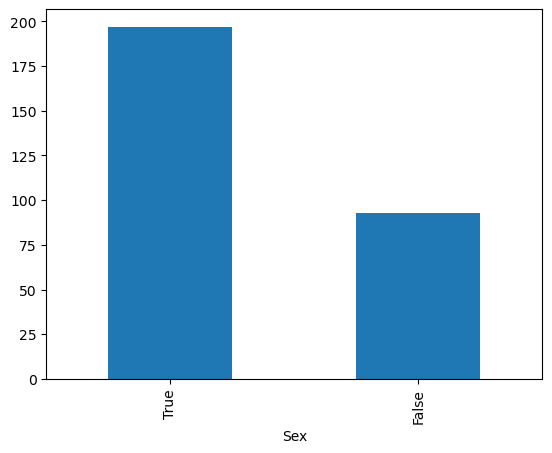

In [63]:
Children['Sex'].value_counts().plot(kind='bar')

#### This shows even among children, more girls survived than boys (about twice). I am not going to calculate how many girls were on board vs boys as I assumed their distribution was normal. I am sorry for the little boys :(

#### Now I am looking at the contribution of class to the survival.

In [64]:
#Pclass= A proxy for socio-economic status (SES) #1st = Upper #2nd = Middle #3rd = Lower

In [65]:
# I want to look at what class had more survival rate and class

<Axes: xlabel='Pclass', ylabel='Age'>

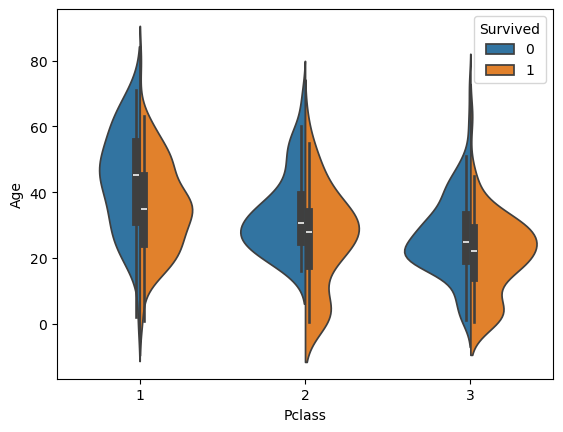

In [66]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=Titan)


#### The above plot shows there were more people survived in class 3 in general and also their age range was lower which makes sense.

<Axes: xlabel='Pclass', ylabel='Fare'>

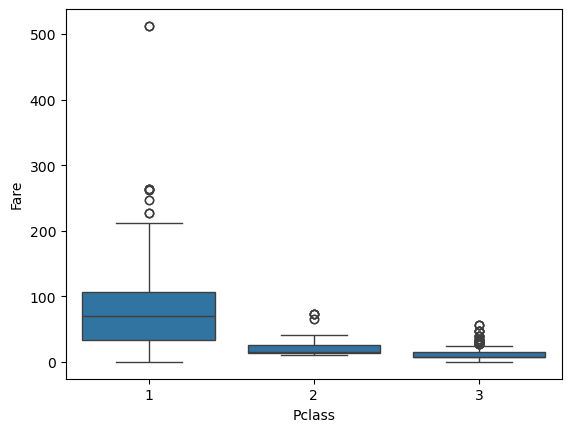

In [67]:
sns.boxplot(x='Pclass',y='Fare',data=Titan)

#### It seems class 1 is the most expensive class, then class 2 and then class 3.

#### now I will look at what percent of each calss survived

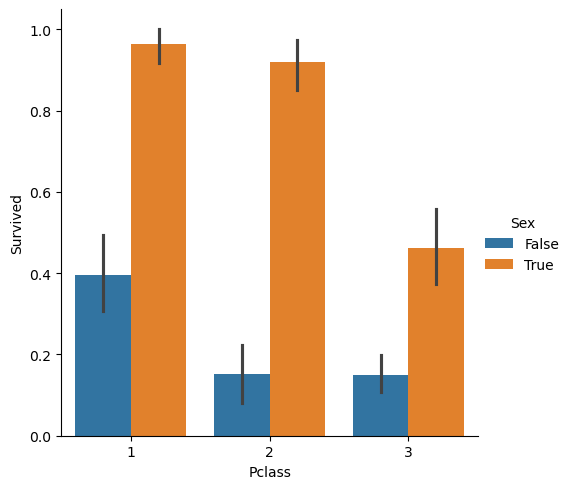

In [68]:
sns.catplot(data=Titan, x="Pclass", y="Survived", hue='Sex', kind="bar")

<Axes: xlabel='Pclass', ylabel='count'>

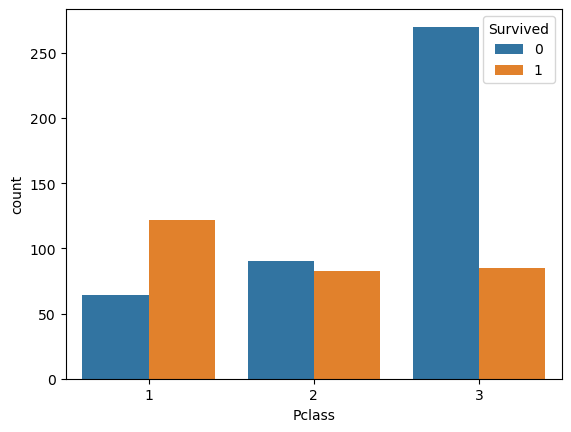

In [69]:

sns.countplot(x ='Pclass', hue = "Survived", data = Titan)

#### This is a very interesting plot! It shows although class 3 was more occupied, but people from class 1 survived more than class 1. As previously was shown tickets of class 1 were more expensive, we can strongly say higher class people survived better.

#### At the end I learnt countplot it count it itself and maybe if I used the same for age, I didn't need to do that all those calculations and divissions and it was easier, but I learnt it at the end of the project!

### Question 1:
#### - My final conclusion is women had a better survival rate
#### - Children had a higher survival rate, even female children survived better, so age and sex were vital factors.
#### - Also people in class 1 survived morem which was the top tire class based on the fare price.
#### - Other factors, like the family size didn't play a big role in survival chance.

### Question 2:
#### - I decided to work on gender, age, and class as they had a correlation with the survival category. I didn't consider the fare as an independent category as it was correlated with the class and I looked at the class in depth.

### Question 3:
#### From the middle of the work I dropped the nans in age as I realized I have about 150 fewer values. That helped me to have a correct sight of the effect of age because it made my sample smaller and the correct rate of survival rate in each range.